# XGBoost Algorithm

### Extreme Gradient Boosting Algorithm

    -> We can use this algorithm for both Classification or Regression problem.
    -> Very Popular and most used Machine Learning Algorithm.
    -> XGBoost is a software that can be installed using pip install for python.
    -> XGBoost provides very high execution speed.
    -> It can be used cross-platform ie; Windows, Linux, MAC, or C, C++, Python, R, Java,.....
    -> Cloud Integration ie; it supports MS Azure, AWS, YARN Clusters, HADOOP, .....
    -> Parallel Optimization ie; Multi processor.
    -> It improves Model performance by Cache Optimization.
    -> and also provides Out of Memory computation ie; handles larger data even more than RAM capacity.

# Ensembling Techniques: -

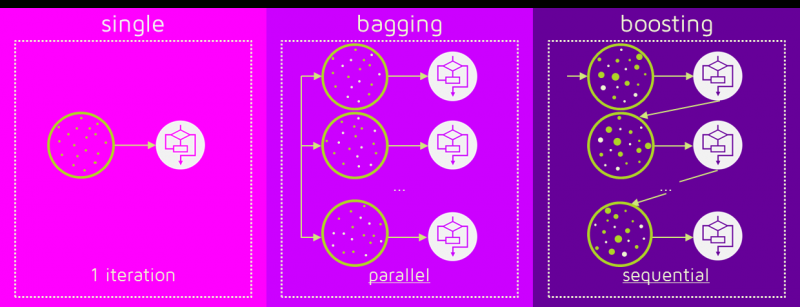

1. Single: - ex: we can consider a Decision Tree where we consider input into a single tree and whatever result we get, that is our conclusion.

2. Bagging: - ex: Random forest where we are considering multiple trees and the result is majority of the results from Random forests - multiple HR take interview, merge feedback and select candidates.

3. Boosting: - ex: different levels of interview where feedback from one HR is passed to next but the next level interview is taken completely.

### Weak Classifiers: 
Weak classifiers (or weak learners) are classifiers that perform only slightly better than a random classifier. These are thus classifiers that have some clue on how to predict the right labels, but not as much as strong classifiers have like, e.g., Naive Bayes, Neural Network or SVM.

# Different types of Ensemble Learning

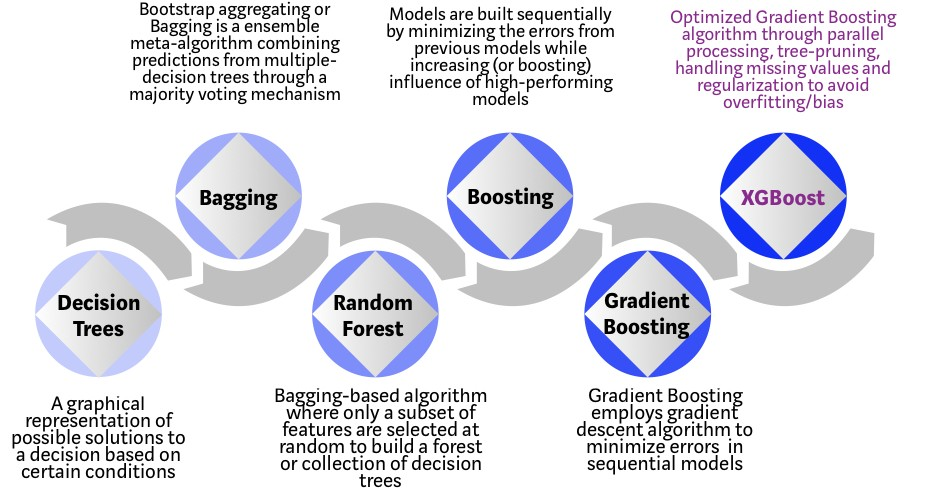

### XGBoost Regression Algorithm

In [1]:
# import necessary modules

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
# read the advertising dataset

data = pd.read_csv(r'C:\Users\singhegm\Downloads\Advertising\Advertising.csv')
data.head()

,TV,Radio,Newspaper,Sales
0,230.1,37.8,69.2,22.1
1,44.5,39.3,45.1,10.4
2,17.2,45.9,69.3,12.0
3,151.5,41.3,58.5,16.5
4,180.8,10.8,58.4,17.9


In [3]:
# lets check the number of rows and columns in our data

data.shape

(200, 4)

In [4]:
# let's get some info about data-types and Null values

data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 4 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   TV         200 non-null    float64
 1   Radio      200 non-null    float64
 2   Newspaper  200 non-null    float64
 3   Sales      200 non-null    float64
dtypes: float64(4)
memory usage: 6.4 KB


In [5]:
# confirm if any Null values

data.isnull().sum()

TV           0
Radio        0
Newspaper    0
Sales        0
dtype: int64

In [6]:
# let's describe the data with all its statistical components

data.describe()

,TV,Radio,Newspaper,Sales
count,200.000000,200.000000,200.000000,200.000000
mean,147.042500,23.264000,30.554000,15.130500
std,85.854236,14.846809,21.778621,5.283892
min,0.700000,0.000000,0.300000,1.600000
25%,74.375000,9.975000,12.750000,11.000000
50%,149.750000,22.900000,25.750000,16.000000
75%,218.825000,36.525000,45.100000,19.050000
max,296.400000,49.600000,114.000000,27.000000


In [7]:
# we can check correlation between columns

data.corr()

,TV,Radio,Newspaper,Sales
TV,1.000000,0.054809,0.056648,0.901208
Radio,0.054809,1.000000,0.354104,0.349631
Newspaper,0.056648,0.354104,1.000000,0.157960
Sales,0.901208,0.349631,0.157960,1.000000


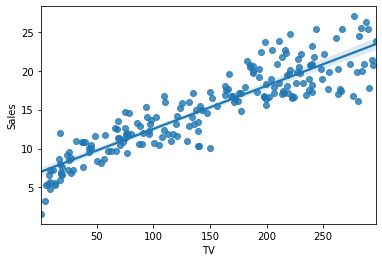

In [8]:
# clearly we can see that Sales on TV is linear with 90% correlation, more marketting on TV : more sales

sns.regplot(x = 'TV', y = 'Sales', data = data)
plt.show()

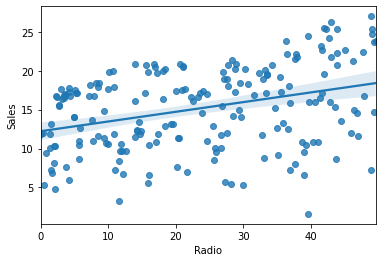

In [9]:
# here we can see Sale is not linear on Radio 34% correlation, hence we can save on marketting cost

sns.regplot(x = 'Radio', y = 'Sales', data = data)
plt.show()

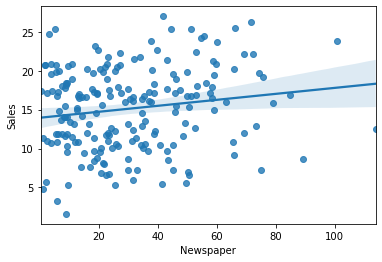

In [10]:
# here we can see Sale is not linear on Newspaper too 15% correlation, hence we can save on marketting cost here also

sns.regplot(x = 'Newspaper', y = 'Sales', data = data)
plt.show()

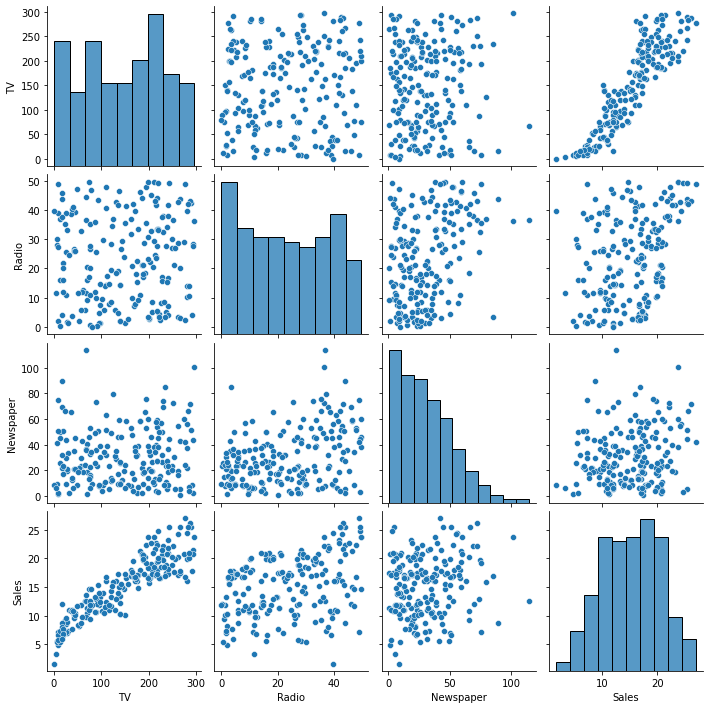

In [11]:
# we can plot paitplot to see type of relations

sns.pairplot(data)
plt.show()

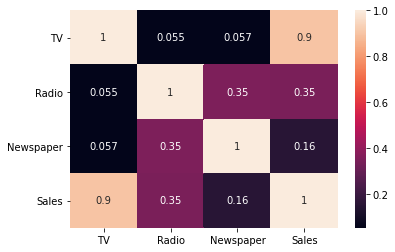

In [12]:
# we can also plot Heatmap to show the correlation

sns.heatmap(data.corr(), annot = True)
plt.show()

## Now let us build our Linear regression model for TV (x) and Sales (y) due to linear behaviour

##  Method 1: - we can use iloc function

In [13]:
x = data.iloc[:,0:1].values
x

array([[230.1],
       [ 44.5],
       [ 17.2],
       [151.5],
       [180.8],
       [  8.7],
       [ 57.5],
       [120.2],
       [  8.6],
       [199.8],
       [ 66.1],
       [214.7],
       [ 23.8],
       [ 97.5],
       [204.1],
       [195.4],
       [ 67.8],
       [281.4],
       [ 69.2],
       [147.3],
       [218.4],
       [237.4],
       [ 13.2],
       [228.3],
       [ 62.3],
       [262.9],
       [142.9],
       [240.1],
       [248.8],
       [ 70.6],
       [292.9],
       [112.9],
       [ 97.2],
       [265.6],
       [ 95.7],
       [290.7],
       [266.9],
       [ 74.7],
       [ 43.1],
       [228. ],
       [202.5],
       [177. ],
       [293.6],
       [206.9],
       [ 25.1],
       [175.1],
       [ 89.7],
       [239.9],
       [227.2],
       [ 66.9],
       [199.8],
       [100.4],
       [216.4],
       [182.6],
       [262.7],
       [198.9],
       [  7.3],
       [136.2],
       [210.8],
       [210.7],
       [ 53.5],
       [261.3],
       [

In [14]:
y = data.iloc[:,3].values
y

array([22.1, 10.4, 12. , 16.5, 17.9,  7.2, 11.8, 13.2,  4.8, 15.6, 12.6,
       17.4,  9.2, 13.7, 19. , 22.4, 12.5, 24.4, 11.3, 14.6, 18. , 17.5,
        5.6, 20.5,  9.7, 17. , 15. , 20.9, 18.9, 10.5, 21.4, 11.9, 13.2,
       17.4, 11.9, 17.8, 25.4, 14.7, 10.1, 21.5, 16.6, 17.1, 20.7, 17.9,
        8.5, 16.1, 10.6, 23.2, 19.8,  9.7, 16.4, 10.7, 22.6, 21.2, 20.2,
       23.7,  5.5, 13.2, 23.8, 18.4,  8.1, 24.2, 20.7, 14. , 16. , 11.3,
       11. , 13.4, 18.9, 22.3, 18.3, 12.4,  8.8, 11. , 17. ,  8.7,  6.9,
       14.2,  5.3, 11. , 11.8, 17.3, 11.3, 13.6, 21.7, 20.2, 12. , 16. ,
       12.9, 16.7, 14. ,  7.3, 19.4, 22.2, 11.5, 16.9, 16.7, 20.5, 25.4,
       17.2, 16.7, 23.8, 19.8, 19.7, 20.7, 15. ,  7.2, 12. ,  5.3, 19.8,
       18.4, 21.8, 17.1, 20.9, 14.6, 12.6, 12.2,  9.4, 15.9,  6.6, 15.5,
        7. , 16.6, 15.2, 19.7, 10.6,  6.6, 11.9, 24.7,  9.7,  1.6, 17.7,
        5.7, 19.6, 10.8, 11.6,  9.5, 20.8,  9.6, 20.7, 10.9, 19.2, 20.1,
       10.4, 12.3, 10.3, 18.2, 25.4, 10.9, 10.1, 16

In [15]:
plt.scatter(X,y)
plt.show()

NameError: name 'X' is not defined

In [ ]:
plt.scatter(x,y)
plt.show()

In [ ]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.2, train_size = 0.8, random_state = 42)

In [ ]:
x_train

In [ ]:
x_test

In [ ]:
y_train

In [ ]:
y_test

In [ ]:
import xgboost as xgb
xgb_reg = xgb.XGBRegressor(objective = "reg:linear")
xgb_reg.fit(x_train, y_train)

In [ ]:
# now we can see that in recent update linear is replaced by squarederror, so let us that to remove warnings instead linear

xgb_reg = xgb.XGBRegressor(objective = "reg:squarederror")
xgb_reg.fit(x_train, y_train)

In [ ]:
yp = xgb_reg.predict(x_test)
yp

In [ ]:
xgb_reg.score(x_train, y_train) * 100

In [ ]:
xgb_reg.score(x_test, y_test) * 100

In [ ]:
plt.plot(y_test, label = 'original')
plt.plot(yp, label = 'predicted')
plt.legend()
plt.show()

# Method 2: - We can use pandas dataframe as our independent variable

In [ ]:
X = pd.DataFrame(data['TV'])
X

In [ ]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, train_size = 0.8, random_state = 42)

In [ ]:
xgb_reg1 = xgb.XGBRegressor(objective = "reg:squarederror")
xgb_reg1.fit(X_train, y_train)

In [ ]:
Yp = xgb_reg1.predict(X_test)
Yp

In [ ]:
xgb_reg1.score(X_train, y_train) * 100

In [ ]:
xgb_reg1.score(X_test, y_test) * 100

### Conclusion: we can see that the score on our test data is 81% in our linear regression model, so if we want to increase the score we can try with different models to check the score and find best_fit